# Mandatory Assignment 1

This is the first of two mandatory assignments which must be completed during the course. First some practical information:

* When is the assignment due?: **23:59, Sunday, August 19, 2018.**
* How do you grade the assignment?: You will **peergrade** each other as primary grading. 
* Can i work with my group?: **yes**

The assigment consist of one to tree problems from each of the exercise sets you have solved so far (excluding set 1 and set 9). We've tried to select problems which are self contained, but it might be nessecary to solve some of the previous exercises in each set to fully answer the problems in this assignment.

## Problems from Exercise Set 2:

> **Ex. 2.2**: Make two lists. The first should be numbered. The second should be unnumbered and contain at least one sublevel. 

# [Answer to Ex. 2.2 here] (convert to markdown cell)

1. this is
2. a
3. list


- this
- list 
    - is
- better

## Problems from Exercise set 3:

> **Ex. 3.1.3:** Let `l1 = ['r ', 'Is', '>', ' < ', 'g ', '?']`. Create from `l1` the sentence "Is r > g?" using your knowledge about string formatting. Make sure there is only one space in between worlds.
>
>> _Hint:_ You should be able to combine the above informations to solve this exercise.

In [34]:
# [Answer to Ex. 3.1.3 here]

l1 = ['r ', 'Is', '>', ' < ', 'g ', '?']

print(l1[1] + ' '+l1[0].strip() +' ' +l1[2]+ ' ' +l1[4].strip()+l1[5])

Is r > g?


> **Ex. 3.1.4**: Create an empty dictionary `words` using the `dict()`function. Then add each of the words in `['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']` as a key, with the value being a boolean indicator for whether the word begins with a vowel. The results should look like `{'bacon': False, 'asynchronous': True ...}`
>
>> _Hint:_ You might want co first construct a function that asseses whether a given word begins with a vowel or not.

In [35]:
# [Answer to Ex. 3.1.4 here]

words = dict()

words = dict({'animal':True,'coffee':False,'python':False,'unit':True,'knowledge':False,'tread':False,'arise':True})

print(words)

{'animal': True, 'coffee': False, 'python': False, 'unit': True, 'knowledge': False, 'tread': False, 'arise': True}


> **Ex. 3.3.2:** use the `requests` module (get it with `pip install requests`) and `construct_link()` to request birth data from the "FOD" table. Get all available years (variable "Tid"), but only female births (BARNKON=P) . Unpack the json payload and store the result. Wrap the whole thing in a function which takes an url as input and returns the corresponding output.
>
>> _Hint:_ The `requests.response` object has a `.json()` method. 
>
>> _Note:_ you wrote `construct_link()` in 3.3.1, if you didn't heres the link you need to get: `https://api.statbank.dk/v1/data/FOLK1A/JSONSTAT?lang=en&Tid=*`

In [36]:
# [Answer to Ex. 3.3.2]

import requests
import pandas as pd


# Funtion that creates url for given table_id and variables.
def construct_link(table_id, variables):
    base = 'https://api.statbank.dk/v1/data/{id}/JSONSTAT?lang=en'.format(id = table_id)
    for var in variables:
        base += '&{v}'.format(v = var)
    return base 

# Function that returns output for given url
def get_output_from_url(url):   
    response = requests.get(url).json()
    print(link)
    d2 = response["dataset"]
    time_dict = list(d2['dimension']['Tid']['category']['index']) # a list of the years where data is from
    times = [int(x) for x in time_dict] # turning years as strings into integers
    births_f = pd.DataFrame(list(zip(times, d2['value']))) # zipping together and DF'ing
    return(births_f)
    #births_f.head(5)

# Uses the construct_link function to generate url for table_id = 'FOD' and variables = 'Tid=*' and 'BARNKON=P':
link = construct_link('FOD', ['Tid=*', 'BARNKON=P'])

# Uses get_output_from_url function to generate output from link.
df_output = get_output_from_url(link)
print(df_output.head())


https://api.statbank.dk/v1/data/FOD/JSONSTAT?lang=en&Tid=*&BARNKON=P
      0      1
0  1973  34996
1  1974  34771
2  1975  35260
3  1976  31533
4  1977  30055


## Problems from exercise set 4


In [37]:
import numpy as np
import pandas as pd

> **Ex. 4.1.1:** Use Pandas' CSV reader to fetch  daily data weather from 1864 for various stations - available [here](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/). 
>
>> *Hint 1*: for compressed files you may need to specify the keyword `compression`.
>
>> *Hint 2*: keyword `header` can be specified as the CSV has no column names.
>
>> *Hint 3*: Specify the path, as the URL linking directly to the 1864 file. 

In [38]:
# [Answer to Ex. 4.1.1 here]
df = pd.read_csv('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz', header = None)
print(df.head(5))

             0         1     2    3    4    5  6   7
0  ITE00100550  18640101  TMAX   10  NaN  NaN  E NaN
1  ITE00100550  18640101  TMIN  -23  NaN  NaN  E NaN
2  ITE00100550  18640101  PRCP   25  NaN  NaN  E NaN
3  ASN00079028  18640101  PRCP    0  NaN  NaN  a NaN
4  USC00064757  18640101  PRCP  119  NaN  NaN  F NaN


> **Ex. 4.1.2:** Structure your weather DataFrame by using only the relevant columns (station identifier, data, observation type, observation value), rename them. Make sure observations are correctly formated (how many decimals should we add? one?).
>
>> *Hint:* rename can be done with `df.columns=COLS` where `COLS` is a list of column names.

In [46]:
# [Answer to Ex. 4.1.2 here]
df2 = df[[0,2,3,6]]

df2.columns=['station_identifier', 'data', 'observation type', 'observation value']
print (df2.head(5))

  station_identifier  data  observation type observation value
0        ITE00100550  TMAX                10                 E
1        ITE00100550  TMIN               -23                 E
2        ITE00100550  PRCP                25                 E
3        ASN00079028  PRCP                 0                 a
4        USC00064757  PRCP               119                 F


> **Ex. 4.1.3:**  Select data for the station `ITE00100550` and only observations for maximal temperature. Make a copy of the DataFrame. Explain in a one or two sentences how copying works.
>
>> *Hint 1*: the `&` operator works elementwise on boolean series (like `and` in core python).
>
>> *Hint 2*: copying of the dataframe is done with the `copy` method for DataFrames.

In [47]:
# [Answer to Ex. 4.1.3 here]
max_temp = df2['data'] == 'TMAX'
station = df2['station_identifier'] == 'ITE00100550'
df3 = df2[max_temp & station]

df4 = df3.copy()

print(df4.head(5))
#df4 is a copy of df3. I can now make modifications in df4 without affecting the initiad DataFrame df3

    station_identifier  data  observation type observation value
0          ITE00100550  TMAX                10                 E
75         ITE00100550  TMAX                 8                 E
152        ITE00100550  TMAX               -28                 E
227        ITE00100550  TMAX                 0                 E
305        ITE00100550  TMAX               -19                 E


> **Ex. 4.1.4:** Make a new column called `TMAX_F` where you have converted the temperature variables to Fahrenheit. 
>
>> *Hint*: Conversion is $F = 32 + 1.8*C$ where $F$ is Fahrenheit and $C$ is Celsius.

In [48]:
# [Answer to Ex. 4.1.4 here]
df4['TMAX_F'] = 32 + 1.8 * df3['observation type']

print(df4.head(5))

    station_identifier  data  observation type observation value  TMAX_F
0          ITE00100550  TMAX                10                 E    50.0
75         ITE00100550  TMAX                 8                 E    46.4
152        ITE00100550  TMAX               -28                 E   -18.4
227        ITE00100550  TMAX                 0                 E    32.0
305        ITE00100550  TMAX               -19                 E    -2.2


## Problems from exercise set 5

In [49]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns 

%matplotlib inline 

iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

> **Ex. 5.1.1:**: Show the first five rows of the titanic dataset. What information is in the dataset? Use a barplot to show the probability of survival for men and women within each passenger class. Can you make a boxplot showing the same information (why/why not?). _Bonus:_ show a boxplot for the fare-prices within each passenger class. 
>
> Spend five minutes discussing what you can learn about the survival-selection aboard titanic from the figure(s).
>
> > _Hint:_ https://seaborn.pydata.org/generated/seaborn.barplot.html, specifically the `hue` option.


In [51]:
# [Answer to Ex. 5.1.1 here]
print(titanic.head(5))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Information about passengers on the Titanic like age, sex, passenger classes and so on.

AxesSubplot(0.125,0.125;0.775x0.755)


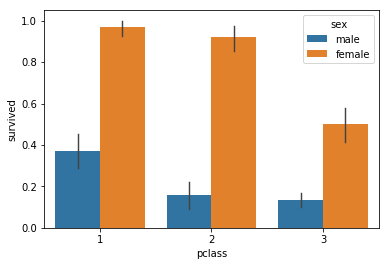

In [52]:
fig_1=sns.barplot(x='pclass', y='survived', hue='sex', data=titanic )
print(fig_1)
#print(sns.boxplot(x='sex', y='survived', data=titanic)) 

Can you make a boxplot showing the same information (why/why not?)

No it is not possible to make a boxplot showing the same information as the barplot, since the passengers either survives or doesn't survive. It looks like all women survived, which is not true. See our code in the cell above.

(0, 200)

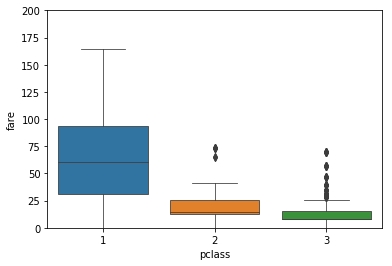

In [53]:
sns.boxplot(x='pclass', y='fare', data=titanic)
plt.ylim([0,200])

> **Ex. 5.1.2:** Using the iris flower dataset, draw a scatterplot of sepal length and petal length. Include a second order polynomial fitted to the data. Add a title to the plot and rename the axis labels.
> _Discuss:_ Is this a meaningful way to display the data? What could we do differently?
>
> For a better understanding of the dataset this image might be useful:
> <img src="iris_pic.png" alt="Drawing" style="width: 200px;"/>
>
>> _Hint:_ use the `.regplot` method from seaborn. 

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


[Text(0,0.5,'Petal'), Text(0.5,0,'Sepal')]

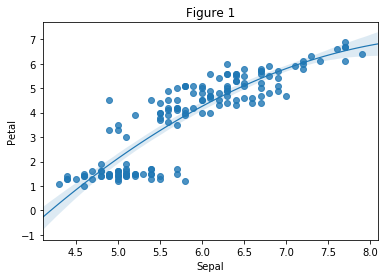

In [54]:
# [Answer to Ex. 5.1.2 here]
print(iris.head(3))

fig_2 = sns.regplot(x='sepal_length', y='petal_length', data = iris, order=2)
fig_2.set_title("Figure 1")
fig_2.set(xlabel='Sepal', ylabel='Petal')

Discuss: Is this a meaningful way to display the data? What could we do differently?

The scatterplot gives us a clear positive relationship between length of petal and sepal leafes. It also seems that the relationship is concave.

It depends on what you want to explain, when choosing the right plot.

> **Ex. 5.1.3:** Combine the two of the figures you created above into a two-panel figure similar to the one shown here:
> <img src="Example.png" alt="Drawing" style="width: 600px;"/>
>
> Save the figure as a png file on your computer. 
>> _Hint:_ See [this question](https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot) on stackoverflow for inspiration.

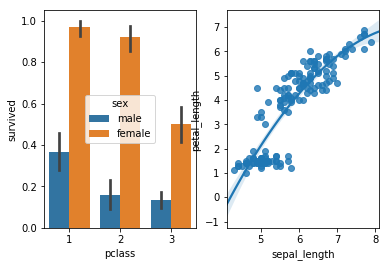

In [16]:
# [Answer to Ex. 5.1.3 here]

fig, axes = plt.subplots(1, 2)

sns.barplot(y="survived", x= "pclass", hue='sex', data = titanic, ax=axes[0])
sns.regplot(y="petal_length", x= "sepal_length", order = 2, data = iris, ax=axes[1])

plt.savefig('fig.png')

> **Ex. 5.1.4:** Use [pairplot with hue](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a figure that clearly shows how the different species vary across measurements. Change the color palette and remove the shading from the density plots. _Bonus:_ Try to explain how the `diag_kws` argument works (_hint:_ [read here](https://stackoverflow.com/questions/1769403/understanding-kwargs-in-python))

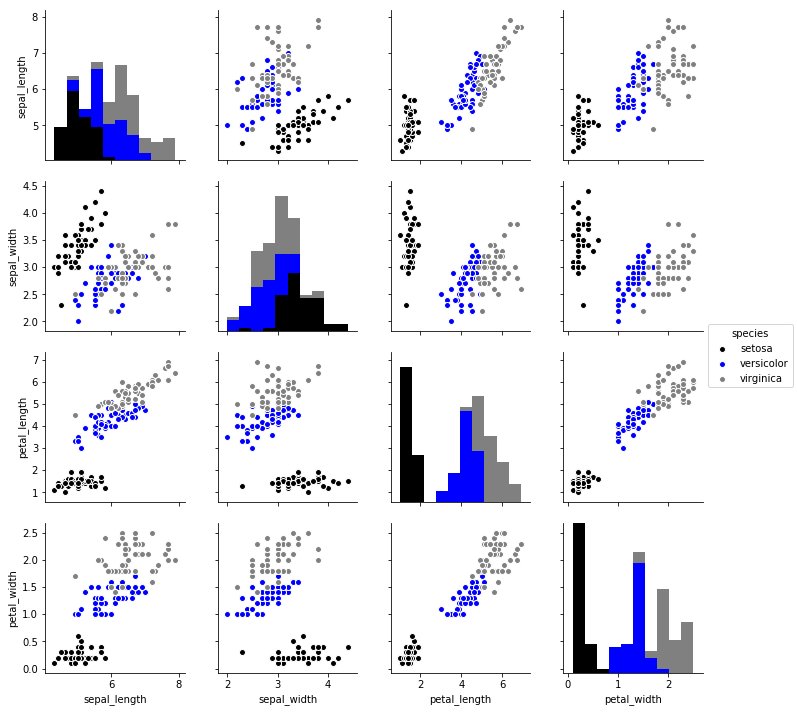

In [17]:
# [Answer to Ex. 5.1.4 here]

sns.pairplot(iris, hue='species', palette={'setosa':'black','versicolor':"blue","virginica":"grey"})

Try to explain how the diag_kws argument works:

The diag_kws argument is a dictionary of arguments, which makes it possible to change the diagonal of the pairplot.

## Problems from exercise set 6

> _Note:_ A central part of these exercises and the ones from exercise set 7 is downloading data from the NOAA servers. If you cannot complete this part, you can download the data as csv files **from [github](https://github.com/abjer/sds/tree/master/material/session_7)**.

In [14]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

> **Ex. 6.1.4:** Extract the country code from the station name into a separate column.
>
>> _Hint:_ The station column contains a GHCND ID, given to each weather station by NOAA. The format of these ID's is a 2-3 letter country code, followed by a integer identifying the specific station. A simple approach is to assume a fixed length of the country ID. A more complex way would be to use the [`re`](https://docs.python.org/2/library/re.html) module.

In [15]:
# [Answer to Ex. 6.1.4]

# Preparation before exercise answer

import pandas as pd

url = "https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz"
df_weather = pd.read_csv(url, compression = "gzip", header = None).drop(columns=[4,5,6,7])

df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
df_weather['obs_value'] = df_weather['obs_value'] / 10
df_select = df_weather[(df_weather.station == 'ITE00100550') & (df_weather.obs_type == 'TMAX')].copy()
df_select['TMAX_F'] = 32 + 1.8 * df_select['obs_value']
weather = df_select.reset_index(drop=True).sort_values(by=['obs_value'])

# [Answer to Ex. 6.1.4]
# We couldn't solve the exercise with the re.findall method, but we made it work with str.extract instead
# The left hand side creates a new column in the dataset "ccode", which we fill in by extracting all
    # letters from 'station'.
# It seems a little redundant in this dataset however - since the dataset provided in the git only
    #contains data fomr one station.
weather["ccode"] = weather["station"].str.extract("([a-zA-Z]+)")

weather.head(3)



,station,datetime,obs_type,obs_value,TMAX_F,ccode
16,ITE00100550,18640117,TMAX,-6.3,20.66,ITE
17,ITE00100550,18640118,TMAX,-5.0,23.00,ITE
13,ITE00100550,18640114,TMAX,-5.0,23.00,ITE


> **Ex. 6.1.5:** Make a function that downloads and formats the weather data according to previous exercises in Exercise Section 4.1, 6.1. You should use data for ALL stations but still only select maximal temperature. _Bonus:_ To validate that your function works plot the temperature curve for each country in the same window. Use `plt.legend()` to add a legend. 

    datetime      stat_id obs_type  value  TMAX_F  month ccode
0 1864-02-26  SZ000006717     TMAX  -34.0  -29.20      2    SZ
1 1864-02-08  SZ000006717     TMAX  -17.4    0.68      2    SZ
2 1864-02-17  CA006158350     TMAX  -16.7    1.94      2    CA
3 1864-01-03  SZ000006717     TMAX  -16.5    2.30      1    SZ


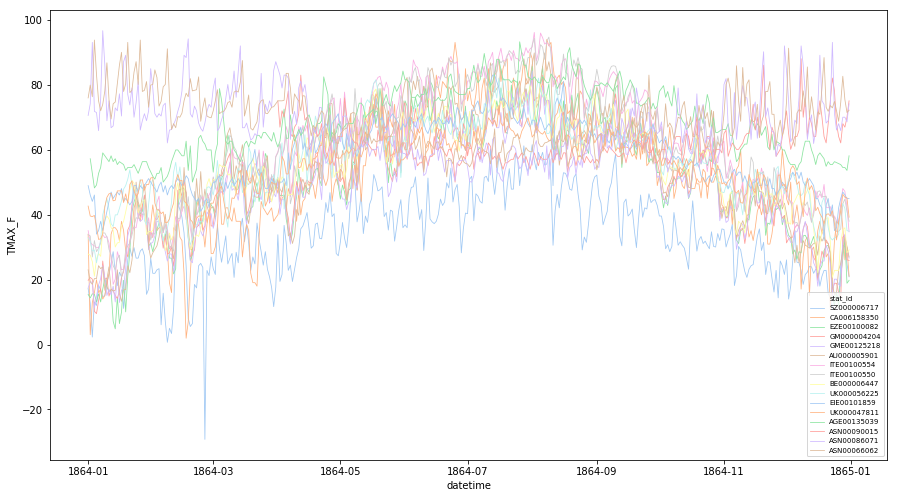

In [27]:
# [Answer to Ex. 6.1.5]
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.style as style

def annualweather(year):
    url = "https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/" + str(year) + ".csv.gz"
    vejr = pd.read_csv(url, compression = "gzip", header = None)\
        .drop(columns=[4,5,6,7])
    vejr.columns = ['stat_id', 'datetime', 'obs_type', 'value']
    vejr['value'] = vejr['value'] / 10
    vejr["TMAX_F"] = vejr["value"] * 1.8 + 32
    vejr1 = vejr[(vejr["obs_type"] == "TMAX")]\
        .copy()
    vejr1 = vejr1.reset_index(drop=True).sort_values(by = "value")
    vejr1["datetime"] = pd.to_datetime(vejr1["datetime"].astype(str), format = "%Y%m%d")
    vejr1['month'] = pd.DatetimeIndex(vejr1['datetime']).month
    vejr1 = vejr1.set_index("datetime")
    vejr1["ccode"] = vejr1["stat_id"].str.extract("([a-zA-Z]+)")
    vejr2 = vejr1.copy().reset_index()
    return(vejr2)

df = annualweather(1864)
print(df.head(4))

fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
sns.set_context(font_scale=1, rc={"lines.linewidth": 0.8})
sns.lineplot(data = df, x="datetime", y="TMAX_F", hue = "stat_id", ax=ax, palette = "pastel")
plt.legend(loc="lower right", fontsize = 7)

## Problems from exercise set 7

> _Note:_ Once again if you haven't managed to download the data from NOAA, you can refer to the github repo to get csv-files containing the required data.

In [22]:
%matplotlib inline 

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl

# Increases the plot size a little
mpl.rcParams['figure.figsize'] = 11, 6

> **Ex. 7.1.1:** Plot the monthly max,min, mean, first and third quartiles for maximum temperature for our station with the ID _'ITE00100550'_ in 1864. 

> *Hint*: the method `describe` computes all these measures.

In [72]:
# [Answer to Ex. 7.1.1]
# [Answer to Ex. 7.1.1]
url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'

df_weather = pd.read_csv('/Users/karlbindslev/Documents/GitHub/sds_group29/Test_karl/material/Exercises/weather_data_1864to1867.csv', header = 0)#.iloc[:,:4]

print(df_weather[(df_weather['year']==1864) & (df_weather['station']=='ITE00100550')].describe())

           datetime   obs_value      TMAX_F    year
count  3.660000e+02  366.000000  366.000000   366.0
mean   1.864067e+07   16.249727   61.249508  1864.0
std    3.457653e+02   10.158772   18.285789     0.0
min    1.864010e+07   -6.300000   20.660000  1864.0
25%    1.864040e+07    7.600000   45.680000  1864.0
50%    1.864070e+07   16.150000   61.070000  1864.0
75%    1.864098e+07   25.325000   77.585000  1864.0
max    1.864123e+07   34.800000   94.640000  1864.0


> **Ex. 7.1.2:** Get the processed data from years 1864-1867 as a list of DataFrames. Convert the list into a single DataFrame by concatenating vertically. 

In [ ]:
# [Answer to Ex. 7.1.2]
list = []
for i in range(1864,1868):
    list.append(df_weather[df_weather['year']==i])
    
#print(list[0].head())
df_weather = pd.concat(list)
print(type(df_weather))
print(df_weather)

> **Ex. 7.1.3:** Parse the station location data which you can find at https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt. Merge station locations onto the weather data spanning 1864-1867.  

> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has fixed width format - does there exist a pandas reader for that?

In [ ]:
# [Answer to Ex. 7.1.3]
colnames = ['station', 'latitude', 'longitude', 'elevation', 'state', 'name', 'gsn flag', 'hcn/crn flag', 'wmo id']
df_location = pd.read_fwf('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt', header = None, names =colnames)
#print(df_location.head())

df_merged = pd.merge(df_weather, df_location, how = 'inner', on = 'station')
#print(df_merged)
print(df_merged.sort_values('datetime'))

## Problems from exercise set 8

> **Ex. 8.1.2.:** Use the `request` module to collect the first page of job postings and unpack the relevant `json` data into a `pandas` DataFrame.

In [1]:
# [Answer to Ex. 8.1.2]
import requests
import pandas as pd

url = 'https://job.jobnet.dk/CV/FindWork/Search'
response = requests.get(url)
#print(response.ok)
response.text
#response = response.json()

#print(response.keys())
#print(response)

'{"Expression":{"ShowNearbyCriteria":true,"Offset":0,"Count":20,"SearchString":null,"SortValue":null,"Id":[],"EarliestPublicationDate":"0001-01-01T00:00:00","HotJob":false,"Abroad":false,"NearBy":null,"ExternalJob":null,"WorkPlaceNotStatic":null,"OnlyGeoPoints":false,"Facets":{"Region":[],"Country":[],"Municipality":[],"PostalCode":[],"OccupationAreas":[],"OccupationGroups":[],"Occupations":[],"EmploymentType":[],"WorkHours":[],"JobAnnouncementType":[],"WorkPlaceNotStatic":[]},"LocatedIn":null,"LocationZip":null,"Location":null,"SearchInGeoDistance":0},"Facets":{"Region":[{"Id":0,"Value":"Hovedstaden og Bornholm","Count":5359},{"Id":0,"Value":"Midtjylland","Count":3189},{"Id":0,"Value":"Syddanmark","Count":2814},{"Id":0,"Value":"Øvrige Sjælland","Count":1581},{"Id":0,"Value":"Nordjylland","Count":1164},{"Id":0,"Value":"Grønland","Count":55}],"Country":[{"Id":0,"Value":"Danmark","Count":14777},{"Id":0,"Value":"Norge","Count":85},{"Id":0,"Value":"Grønland","Count":55},{"Id":0,"Value":"Sv

> **Ex. 8.1.3.:** Store and print the 'TotalResultCount' value for later use. Also create a dataframe from the 'JobPositionPostings' field in the json. 

In [ ]:
# [Answer to Ex. 8.1.3]
result_count =response['TotalResultCount']
print(result_count)

job_postings =pd.DataFrame(response['JobPositionPostings'])
print(job_postings)

## Problems from exercise set 9

> **Ex. 9.2.1:** Load the data used in the exercise using the `pd.read_csv` function. (Hint: path to file can be both a url or systempath). 

>Define a variable `sample_string = '\n'.join(df.sample(2000).reviewBody)` as sample of all the reviews that you will practice on.  (Run it once in a while to get a new sample for potential differences).
Imagine we were a company wanting to find the reviews where customers are concerned with the price of a service. They decide to write a regular expression to match all reviews where a currencies and an amount is mentioned. 

In [61]:
# [Answer to Ex. 9.2.1]
import requests
url = 'https://raw.githubusercontent.com/snorreralund/explore_regex/master/explore_regex.py'
response = requests.get(url)
with open('explore_regex.py','w') as f:
    f.write(response.text)
import explore_regex as e_re
import pandas as pd
%matplotlib inline

url2 = 'https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv'
df = pd.read_csv(url2)

sample_string = '\n'.join(df.sample(2000).reviewBody)
print(sample_string)


Very courteous and helpful customer service representative...Thank You
All the items ordered arrived in good condition and did not take long.
Petflow makes it so easy to not have to worry about running out of dog or cat food with their automatic shipments.  I also love that you can use manufacturers coupons as well by contacting customer service. Prices are competitive too and free or reduced price shipping is another added bonus!
Love Thriftbooks! I buy all my books there, almost new For amazing deals. The shipping is a little slow, but for the amazing bargains it’s totally alright. I’ve been buying books through them for years and always had wonderful service. I tell anyone looking to purchase books about them.
I love the Taylor of Old Bond Street line of products.
Never thought that could be this easy.
So far all have gone well.
Easiest die to understand and use. Offered the best flight and price of all the big sites
Recently I'd seen Greek, and Roman mysteries and Christmas cookboo

> **Ex. 9.2.2:** 
> Write an expression that matches both the dollar-sign (\$) and dollar written literally, and the amount before or after a dollar-sign. Remember that the "$"-sign is a special character in regular expressions. Explore and refine using the explore_pattern function in the package I created called explore_regex. 
```python
import explore_regex as e_re
explore_regex = e_re.Explore_Regex(sample_string) # Initaizlie the Explore regex Class.
explore_regex.explore_pattern(pattern) # Use the .explore_pattern method.
```


Start with exploring the context around digits ("\d") in the data. 

In [60]:
# [Answer to exercise 9.2.1] 

explore_currency = e_re.ExploreRegex(sample_string)

first = '\$'
second = '\$[0-9]'
third = '\$[0-9]+(?:[,.][0-9]+)?'
fourth = '\$[0-9]+(?:[,.][0-9]+)?\s{0,2}'
final = '(?:oner)?$[0-9]+(?:[,.][0-9]+)?\s{0,5}'
patterns = [first,second,third,fourth,final]
for pattern in patterns:
    explore_currency.explore_difference(pattern,patterns[0])
explore_currency.explore_pattern(second)


first2 = '[0-9]+dollar'
second2 = '[0-9]+(?:[,.][0-9]+)?dollar'
third2 = '[0-9]+(?:[,.][0-9]+)?\s{0,2}dollar'
final2 = '[0-9]+(?:[,.][0-9]+)?\s{0,5}dollar(?:oner)?'
patterns2 = [first2,second2,third2,final2]
for pattern in patterns2:
    explore_currency.explore_difference(pattern,patterns2[0])
explore_currency.explore_pattern(second)

------ Pattern: \$	 Matched 103 patterns -----
Found 0 overlaps between the expressions:
        pattern1: \$ 	 and
        pattern2: \$
        103 included in pattern1 and not in the pattern2
        103 was included in pattern2 and not in pattern1
------ Pattern: \$[0-9]	 Matched 92 patterns -----
Found 184 overlaps between the expressions:
        pattern1: \$[0-9] 	 and
        pattern2: \$
        0 included in pattern1 and not in the pattern2
        11 was included in pattern2 and not in pattern1
------ Pattern: \$[0-9]+(?:[,.][0-9]+)?	 Matched 92 patterns -----
Found 184 overlaps between the expressions:
        pattern1: \$[0-9]+(?:[,.][0-9]+)? 	 and
        pattern2: \$
        0 included in pattern1 and not in the pattern2
        11 was included in pattern2 and not in pattern1
------ Pattern: \$[0-9]+(?:[,.][0-9]+)?\s{0,2}	 Matched 92 patterns -----
Found 184 overlaps between the expressions:
        pattern1: \$[0-9]+(?:[,.][0-9]+)?\s{0,2} 	 and
        pattern2: \$
     

> **Ex.9.2.3** Use the .report() method. e_re.report(), and print the all patterns in the development process using the .pattern method - i.e. e_re.patterns 

['\\$', '\\$[0-9]', '\\$[0-9]+(?:[,.][0-9]+)?', '\\$[0-9]+(?:[,.][0-9]+)?\\s{0,2}', '(?:oner)?$[0-9]+(?:[,.][0-9]+)?\\s{0,5}', '[0-9]+dollar', '[0-9]+(?:[,.][0-9]+)?dollar', '[0-9]+(?:[,.][0-9]+)?\\s{0,2}dollar', '[0-9]+(?:[,.][0-9]+)?\\s{0,5}dollar(?:oner)?']
------ Pattern: \$	 Matched 103 patterns -----
------ Pattern: \$[0-9]	 Matched 92 patterns -----
------ Pattern: \$[0-9]+(?:[,.][0-9]+)?	 Matched 92 patterns -----
------ Pattern: \$[0-9]+(?:[,.][0-9]+)?\s{0,2}	 Matched 92 patterns -----
------ Pattern: (?:oner)?$[0-9]+(?:[,.][0-9]+)?\s{0,5}	 Matched 0 patterns -----
------ Pattern: [0-9]+dollar	 Matched 0 patterns -----
------ Pattern: [0-9]+(?:[,.][0-9]+)?dollar	 Matched 0 patterns -----
------ Pattern: [0-9]+(?:[,.][0-9]+)?\s{0,2}dollar	 Matched 4 patterns -----
------ Pattern: [0-9]+(?:[,.][0-9]+)?\s{0,5}dollar(?:oner)?	 Matched 4 patterns -----


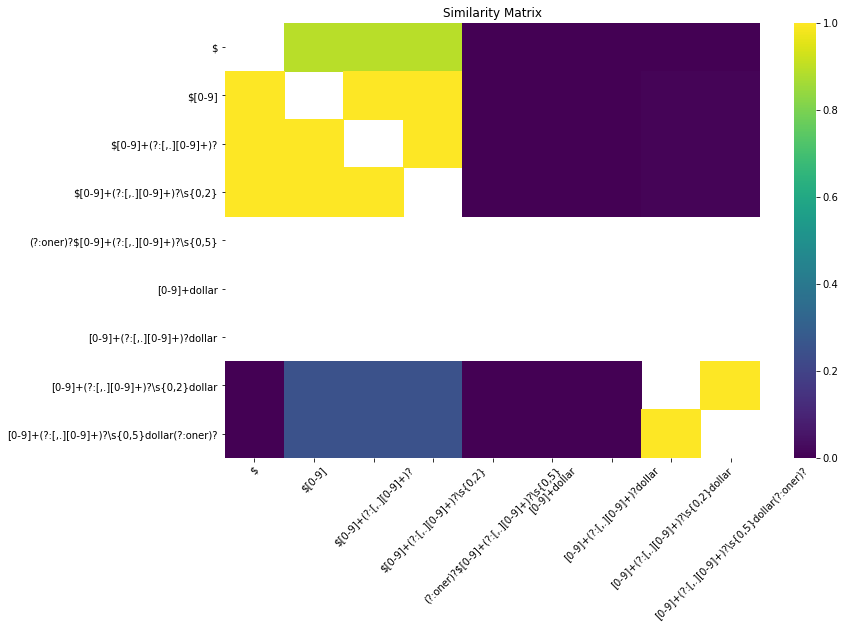

In [70]:
# [Answer to Ex. 9.2.3]
# Printing patterns:
print(explore_currency.patterns)

# Plotting
explore_currency.report('soft')
